# Method 1 - comparing before and after boxcox/log transformation to the dataset

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# ML models and utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)

# Imbalanced dataset handling
from imblearn.over_sampling import SMOTE

# Data visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Widgets and interactivity
import ipywidgets as widgets
from IPython.display import display, clear_output


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## 1.Data Processing

In [ ]:
#import data
card_df = pd.read_csv('/Users/xiaofanjiao/Desktop/Variant III.csv')
card_org = card_df.copy()

In [ ]:
# Selecting the desired variables
selected_variables = ['fraud_bool','income', 'name_email_similarity', 'prev_address_months_count',
                      'current_address_months_count', 'customer_age',
                      'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                      'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free',
                      'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'foreign_request',
                      'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w']

# Creating a new dataset with selected variables
new_dataset = card_org[selected_variables].copy()
print(new_dataset.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.5               0.489311                         24   
1           0     0.9               0.535394                         -1   
2           0     0.5               0.188964                         -1   
3           0     0.4               0.391397                         29   
4           0     0.1               0.592711                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            20            50            0.019819   
1                            82            40            0.007959   
2                            73            60            0.027117   
3                             5            20            0.021103   
4                           267            40            0.039380   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  credit_risk_score  \
0               -0.857899          1842  1035.647957  

## 2.Find catergorical or numerical

In [ ]:
categorical_data = new_dataset[['email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session']]
numerical_data = new_dataset[['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']]


In [ ]:
numerical_data = new_dataset[['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count',
                              'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                              'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count',
                              'session_length_in_minutes', 'device_distinct_emails_8w']]

# Plotting histograms for each variable
# for column in numerical_data.columns:
#     plt.figure(figsize=(8, 6))
#     plt.hist(numerical_data[column], bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()


In [ ]:
numerical_data.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,session_length_in_minutes,device_distinct_emails_8w
0,0.5,0.489311,24,20,50,0.019819,-0.857899,1842,1035.647957,0,1,151,-1,1.873109,1
1,0.9,0.535394,-1,82,40,0.007959,-1.560356,1241,6594.341545,177,7,209,20,20.170591,1
2,0.5,0.188964,-1,73,60,0.027117,-0.897317,1095,9466.532445,1,4,106,-1,1.722109,1
3,0.4,0.391397,29,5,20,0.021103,-0.473215,888,9607.127166,20,14,243,2,2.152433,1
4,0.1,0.592711,-1,267,40,0.039380,16.213862,599,7747.526433,6,14,157,28,14.204698,1


### Scale Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert the scaled data back to a dataframe
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

# Print the first five rows of the scaled data
scaled_numerical_data.head()


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,session_length_in_minutes,device_distinct_emails_8w
0,0.500,0.489311,0.0625,0.048837,0.500,0.000259,0.115865,0.276884,0.071460,0.000000,0.025641,0.580531,0.000000,0.033189,0.666667
1,1.000,0.535394,0.0000,0.193023,0.375,0.000104,0.110396,0.186494,0.399812,0.074464,0.179487,0.683186,0.636364,0.244555,0.666667
2,0.500,0.188964,0.0000,0.172093,0.625,0.000354,0.115558,0.164536,0.569473,0.000421,0.102564,0.500885,0.000000,0.031445,0.666667
3,0.375,0.391397,0.0750,0.013953,0.125,0.000276,0.118860,0.133404,0.577778,0.008414,0.358974,0.743363,0.090909,0.036416,0.666667
4,0.000,0.592711,0.0000,0.623256,0.375,0.000514,0.248779,0.089938,0.467931,0.002524,0.358974,0.591150,0.878788,0.175639,0.666667


In [ ]:
# combine scaled_numerical_data with categorical_data

combined_data = pd.concat([scaled_numerical_data, categorical_data], axis=1)
combined_data.head()


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,bank_branch_count_8w,...,credit_risk_score,bank_months_count,session_length_in_minutes,device_distinct_emails_8w,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
0,0.500,0.489311,0.0625,0.048837,0.500,0.000259,0.115865,0.276884,0.071460,0.000000,...,0.580531,0.000000,0.033189,0.666667,0,0,1,0,0,0
1,1.000,0.535394,0.0000,0.193023,0.375,0.000104,0.110396,0.186494,0.399812,0.074464,...,0.683186,0.636364,0.244555,0.666667,0,0,1,0,0,1
2,0.500,0.188964,0.0000,0.172093,0.625,0.000354,0.115558,0.164536,0.569473,0.000421,...,0.500885,0.000000,0.031445,0.666667,1,1,1,0,0,1
3,0.375,0.391397,0.0750,0.013953,0.125,0.000276,0.118860,0.133404,0.577778,0.008414,...,0.743363,0.090909,0.036416,0.666667,1,1,1,0,0,1
4,0.000,0.592711,0.0000,0.623256,0.375,0.000514,0.248779,0.089938,0.467931,0.002524,...,0.591150,0.878788,0.175639,0.666667,1,0,1,0,0,0


## 3.Boxcox or Log only for numerical values

1. For columns with all positive values and no zeros, we can apply the logarithmic transformation directly.
2. For columns with zero or negative values, we'll use the Box-Cox transformation. We'll add a small constant (like 1) to these columns to ensure all values are positive before applying the transformation.

In [ ]:
# Check if all values in the DataFrame are positive
if (scaled_numerical_data <= 0).any().any():
    # Shift data to make all values positive if necessary
    min_vals = scaled_numerical_data.min()
    shift = (min_vals[min_vals <= 0] - 0.1).abs()
    transformed_data = np.log(scaled_numerical_data + shift)
else:
    # Apply Box-Cox transformation
    transformed_data = scaled_numerical_data.copy()
    for col in scaled_numerical_data.columns:
        transformed_data[col], _ = boxcox(scaled_numerical_data[col])



In [ ]:
# Plot histograms for transformed variables

# for column in transformed_data.columns:
#     plt.figure(figsize=(8, 6))
#     plt.hist(transformed_data[column], bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of Transformed {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

In [ ]:
# Combine transformed numerical data with categorical data
combined_data_transformed = pd.concat([transformed_data, categorical_data], axis=1)
combined_data_transformed.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,bank_branch_count_8w,...,credit_risk_score,bank_months_count,session_length_in_minutes,device_distinct_emails_8w,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
0,-0.510826,-0.528802,-1.817077,-1.904902,-0.510826,-2.300000,-1.533102,-0.975819,-1.763403,-2.302585,...,-0.384882,-2.302585,-2.015985,-0.265703,0,0,1,0,0,0
1,0.095310,-0.453509,-2.302585,-1.227503,-0.744440,-2.301546,-1.558763,-1.250037,-0.693522,-1.746039,...,-0.244385,-0.306031,-1.065502,-0.265703,0,0,1,0,0,1
2,-0.510826,-1.241452,-2.302585,-1.301611,-0.321584,-2.299050,-1.534524,-1.329778,-0.401265,-2.298387,...,-0.509352,-2.302585,-2.029168,-0.265703,1,1,1,0,0,1
3,-0.744440,-0.710502,-1.742969,-2.171965,-1.491655,-2.299833,-1.519323,-1.454986,-0.388936,-2.221798,...,-0.170358,-1.655958,-1.992048,-0.265703,1,1,1,0,0,1
4,-2.302585,-0.367142,-2.302585,-0.323992,-0.744440,-2.297456,-1.053317,-1.661056,-0.565755,-2.277657,...,-0.369398,-0.021440,-1.288663,-0.265703,1,0,1,0,0,0


### Fraud_bool needs balance

Balancing the dataset before feeding it into a logistic regression model is a crucial consideration when dealing with highly imbalanced data, like in your case where the fraud_bool column is significantly skewed towards one class. Imbalanced data can lead to biased models that may not perform well in predicting the minority class, which is often the class of interest in fraud detection scenarios.

In [ ]:
new_dataset['fraud_bool'].value_counts()


0    988970
1     11030
Name: fraud_bool, dtype: int64

Oversampling the minority class: You can increase the number of samples in the minority class (in your case, the class with fraud_bool = 1) by duplicating them or using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

## 4.Fit Data to model (train test) with boxcox and log transformation

In [ ]:
# Preparing the data
x_variable = combined_data_transformed
y_variable = new_dataset['fraud_bool']

### Logistic regression

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)


# # Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Fitting the Logistic Regression model on the resampled training set
logistic_model = LogisticRegression(max_iter=100, solver='newton-cholesky', random_state=42)

# model = SVC(max_iter=100, kernel='rbf', random_state=42)

# model = RandomForestClassifier(
#         max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)

# model = GaussianNB()


logistic_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
logistic_predictions = logistic_model.predict(X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, logistic_predictions)
precision_lr = precision_score(y_test, logistic_predictions)
recall_lr = recall_score(y_test, logistic_predictions)
f1_lr = f1_score(y_test, logistic_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Logistic Regression vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_lr:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_lr:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_lr:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_lr:.4f} vs {f1_dummy:.4f}")


Logistic Regression vs Dummy Classifier
---------------------------------------
Accuracy:  0.7528 vs 0.9889
Precision: 0.0310 vs 0.0000
Recall:    0.7048 vs 0.0000
F1 Score:  0.0593 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


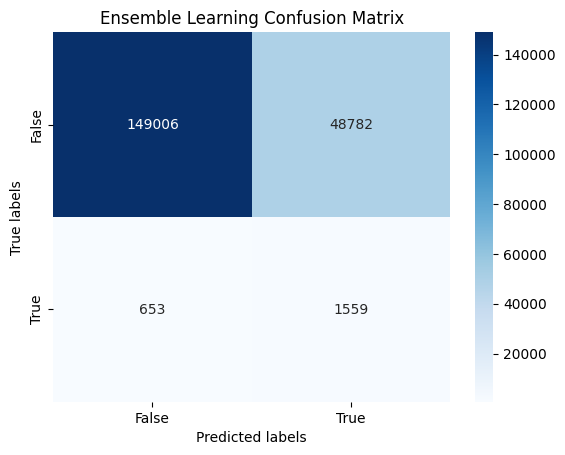

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating confusion matrix for Logistic Regression model
conf_matrix_lg = confusion_matrix(y_test, logistic_predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_lg, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_lg

array([[149006,  48782],
       [   653,   1559]])

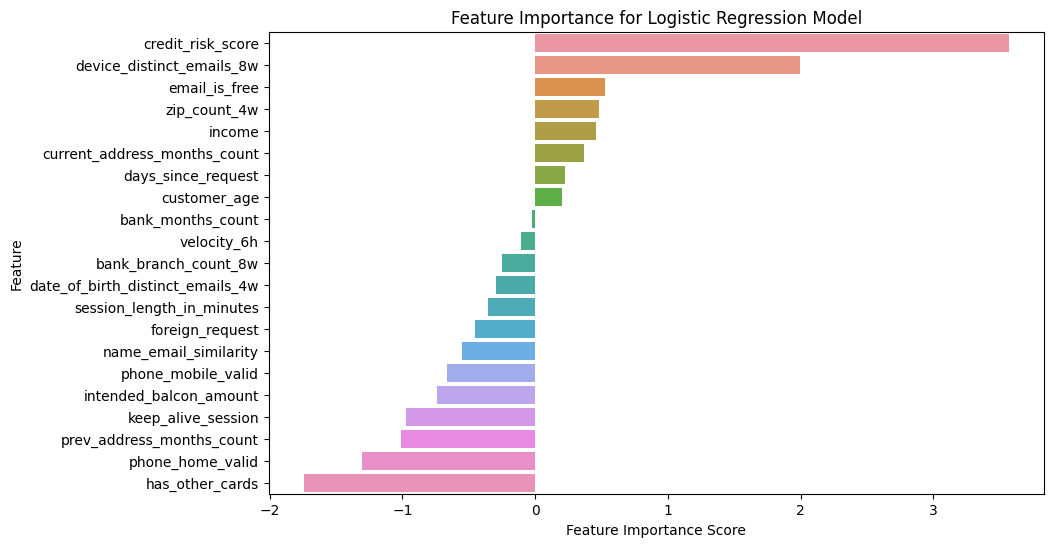

In [ ]:
feature_importance = pd.Series(logistic_model.coef_[0], index=x_variable.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance for Logistic Regression Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
feature_importance.head(10)

credit_risk_score               3.565766
device_distinct_emails_8w       1.991097
email_is_free                   0.525590
zip_count_4w                    0.477617
income                          0.457322
current_address_months_count    0.366712
days_since_request              0.225002
customer_age                    0.201179
bank_months_count              -0.023812
velocity_6h                    -0.103360
dtype: float64

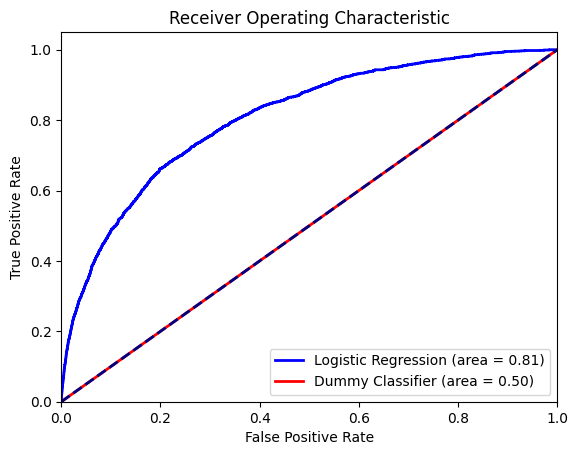

In [ ]:
# Obtain the probabilities for the Logistic Regression model
lr_probs = logistic_model.predict_proba(X_test)[:, 1]

dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Random Forest


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)


# # Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Fitting the Logistic Regression model on the resampled training set
# model = LogisticRegression(max_iter=100, solver='newton-cholesky', random_state=42)

# model = SVC(max_iter=100, kernel='rbf', random_state=42)

random_forest_model = RandomForestClassifier(
        max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)

# model = GaussianNB()


random_forest_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
rf_predictions = random_forest_model.predict(X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, rf_predictions)
precision_lr = precision_score(y_test, rf_predictions)
recall_lr = recall_score(y_test, rf_predictions)
f1_lr = f1_score(y_test, rf_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Random Forest vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_lr:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_lr:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_lr:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_lr:.4f} vs {f1_dummy:.4f}")


Random Forest vs Dummy Classifier
---------------------------------------
Accuracy:  0.7986 vs 0.9889
Precision: 0.0354 vs 0.0000
Recall:    0.6551 vs 0.0000
F1 Score:  0.0671 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


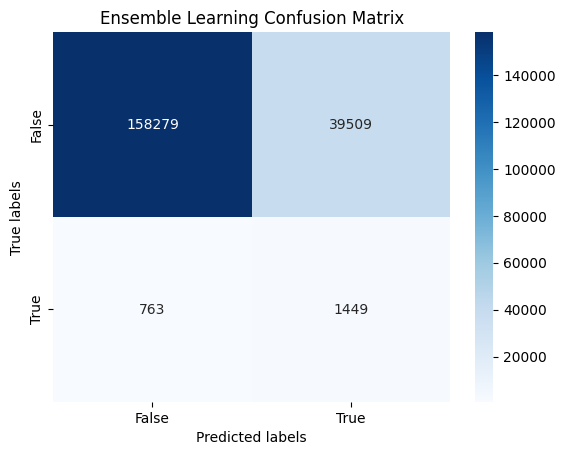

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_rf

array([[158279,  39509],
       [   763,   1449]])

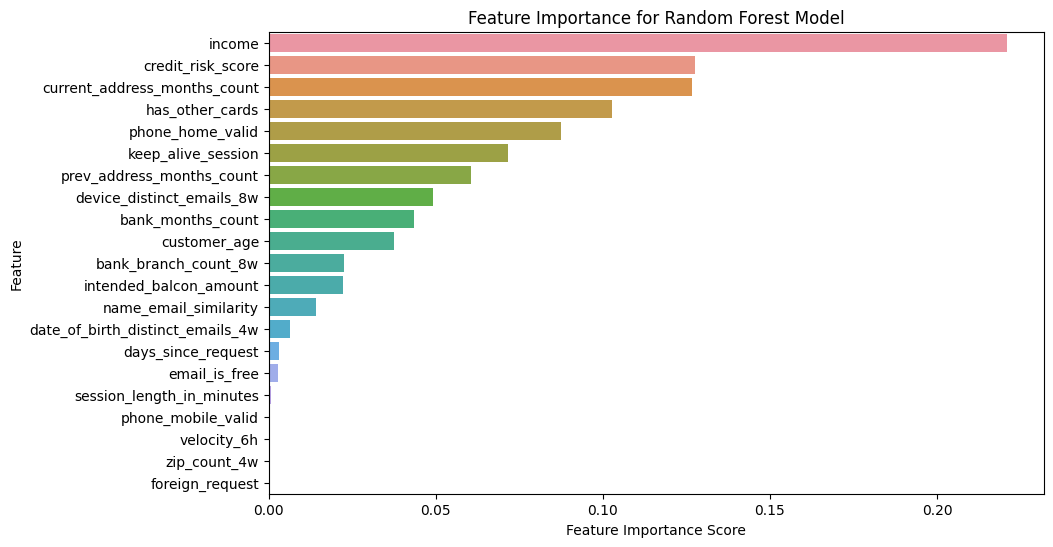

In [ ]:

feature_importance_rf = pd.Series(random_forest_model.feature_importances_, index=x_variable.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index)
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
feature_importance_rf.head(10)

income                          0.220923
credit_risk_score               0.127619
current_address_months_count    0.126770
has_other_cards                 0.102652
phone_home_valid                0.087512
keep_alive_session              0.071516
prev_address_months_count       0.060387
device_distinct_emails_8w       0.049085
bank_months_count               0.043351
customer_age                    0.037399
dtype: float64

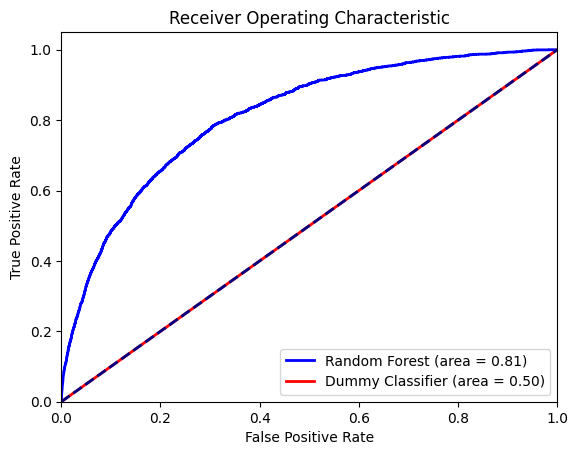

In [ ]:
# Obtain the probabilities for the Random Forest model
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]

# For the Dummy Classifier, as before, we take the probability of the positive class
dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Naive Bayes

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)


# # Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Fitting the Logistic Regression model on the resampled training set
# model = LogisticRegression(max_iter=100, solver='newton-cholesky', random_state=42)

# model = SVC(max_iter=100, kernel='rbf', random_state=42)

# model = RandomForestClassifier(
#         max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)

naive_bayes_model = GaussianNB()


naive_bayes_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
nb_predictions = naive_bayes_model.predict(X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, nb_predictions)
precision_lr = precision_score(y_test, nb_predictions)
recall_lr = recall_score(y_test, nb_predictions)
f1_lr = f1_score(y_test, nb_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Naive Bayes vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_lr:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_lr:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_lr:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_lr:.4f} vs {f1_dummy:.4f}")


Naive Bayes vs Dummy Classifier
---------------------------------------
Accuracy:  0.6820 vs 0.9889
Precision: 0.0241 vs 0.0000
Recall:    0.7034 vs 0.0000
F1 Score:  0.0466 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


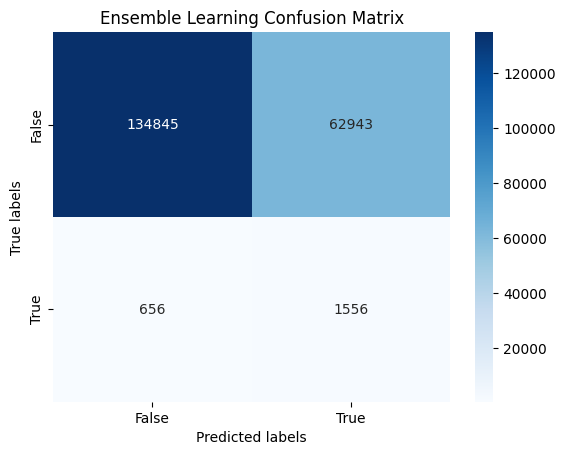

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_nb

array([[134845,  62943],
       [   656,   1556]])

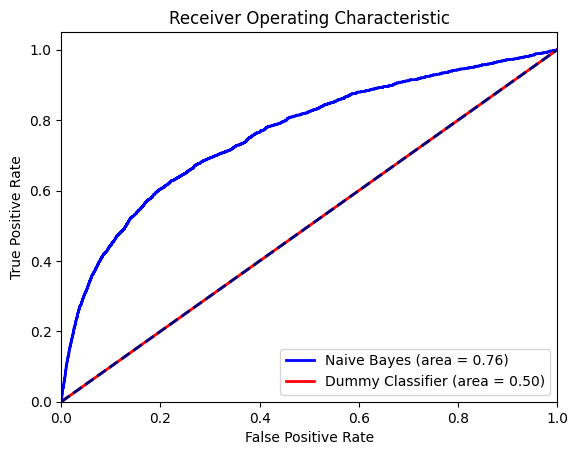

In [ ]:
# Obtain the probabilities for the Random Forest model
rf_probs = naive_bayes_model.predict_proba(X_test)[:, 1]

# For the Dummy Classifier, as before, we take the probability of the positive class
dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Ensemble

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)

# Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Constructing an ensemble model
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return pd.DataFrame(predictions).mode().iloc[0]

# Making predictions on the test set
ensemble_models = [logistic_model, random_forest_model, naive_bayes_model]
predictions = ensemble_predict(ensemble_models, X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_ensemble = accuracy_score(y_test, predictions)
precision_ensemble = precision_score(y_test, predictions)
recall_ensemble = recall_score(y_test, predictions)
f1_ensemble = f1_score(y_test, predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Ensemble Learning vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_ensemble:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_ensemble:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_ensemble:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_ensemble:.4f} vs {f1_dummy:.4f}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ensemble Learning vs Dummy Classifier
---------------------------------------
Accuracy:  0.7576 vs 0.9889
Precision: 0.0316 vs 0.0000
Recall:    0.7061 vs 0.0000
F1 Score:  0.0605 vs 0.0000


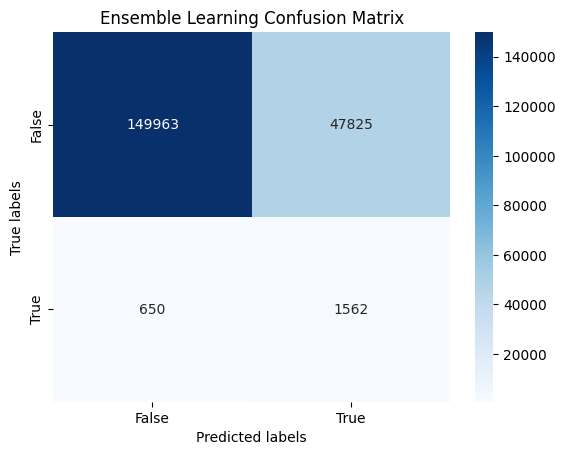

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_el = confusion_matrix(y_test, predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_el, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_el

array([[149963,  47825],
       [   650,   1562]])

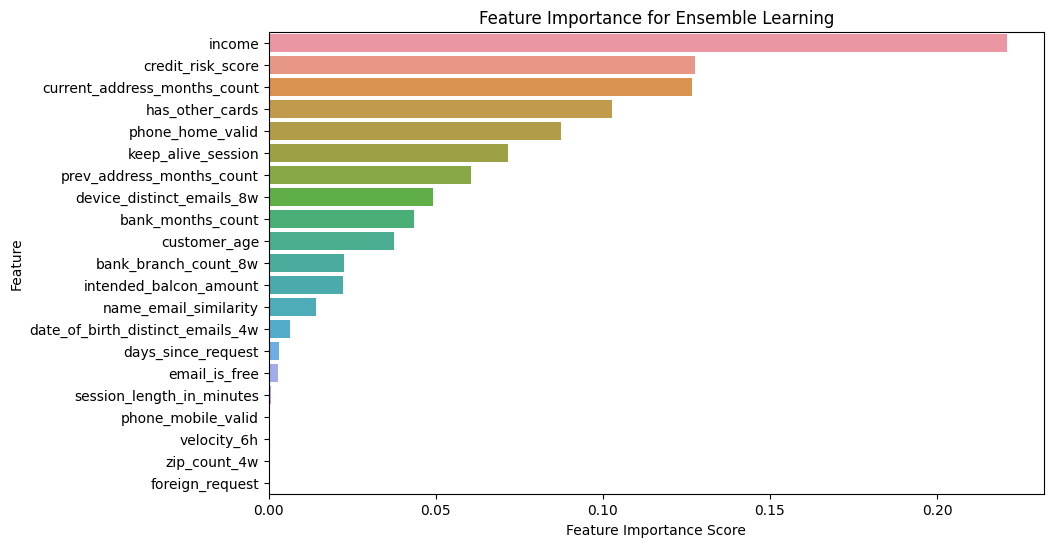

In [ ]:
# Filter ensemble_models to include only models with feature_importances_ attribute
models_with_feature_importance = [model for model in ensemble_models if hasattr(model, 'feature_importances_')]

# Calculate feature importance
feature_importance_ensemble = pd.Series(np.mean([model.feature_importances_ for model in models_with_feature_importance], axis=0),
                                        index=x_variable.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_ensemble, y=feature_importance_ensemble.index)
plt.title('Feature Importance for Ensemble Learning')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
feature_importance_ensemble.head(10)

income                          0.220923
credit_risk_score               0.127619
current_address_months_count    0.126770
has_other_cards                 0.102652
phone_home_valid                0.087512
keep_alive_session              0.071516
prev_address_months_count       0.060387
device_distinct_emails_8w       0.049085
bank_months_count               0.043351
customer_age                    0.037399
dtype: float64

ROC AUC: 0.804


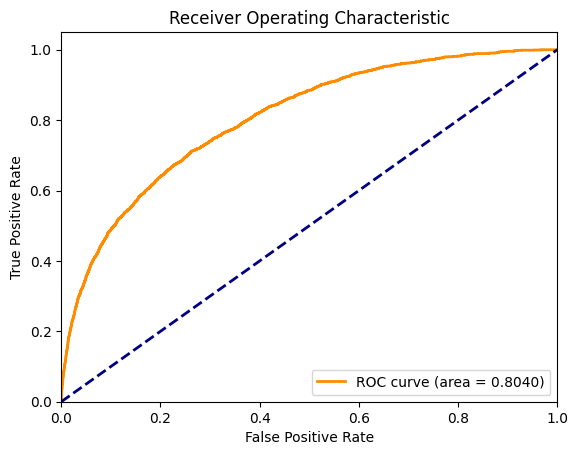

In [ ]:
# Modified ensemble predict to average probabilities
def ensemble_predict_proba(models, X):
    # Ensure all models have a predict_proba method
    if not all(hasattr(model, 'predict_proba') for model in models):
        raise ValueError("All models must have a predict_proba method")

    # Averaging predicted probabilities
    predictions_proba = np.mean([model.predict_proba(X)[:, 1] for model in models], axis=0)
    return predictions_proba

# Predict probabilities for the test set
probabilities = ensemble_predict_proba(ensemble_models, X_test)

# Compute ROC AUC
roc_auc = round(roc_auc_score(y_test, probabilities), 3)
print(f"ROC AUC: {roc_auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## 5. Evaluate (Acciracy, F1) with transformation

Logistic Regression vs Dummy Classifier
---------------------------------------
Accuracy:  0.7528 vs 0.9889
Precision: 0.0310 vs 0.0000
Recall:    0.7048 vs 0.0000
F1 Score:  0.0593 vs 0.0000

Random Forest vs Dummy Classifier
---------------------------------------
Accuracy:  0.7986 vs 0.9889
Precision: 0.0354 vs 0.0000
Recall:    0.6551 vs 0.0000
F1 Score:  0.0671 vs 0.0000

Naive Bayes vs Dummy Classifier
---------------------------------------
Accuracy:  0.6820 vs 0.9889
Precision: 0.0241 vs 0.0000
Recall:    0.7034 vs 0.0000
F1 Score:  0.0466 vs 0.0000

Ensemble Learning vs Dummy Classifier
---------------------------------------
Accuracy:  0.7576 vs 0.9889
Precision: 0.0316 vs 0.0000
Recall:    0.7061 vs 0.0000
F1 Score:  0.0605 vs 0.0000

## Visualization

In [ ]:

# Define function to get metrics
def get_metrics(model_name, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Define function to plot ROC curve and display metrics
def plot_roc_and_display_metrics(selected_models):
    metrics_data = []
    plt.figure(figsize=(8, 6))

    for model_name in selected_models:
        if model_name == 'Logistic Regression':
            probs = logistic_model.predict_proba(X_test)[:, 1]
            color = 'blue'
            predictions = logistic_model.predict(X_test)
        elif model_name == 'Random Forest':
            probs = random_forest_model.predict_proba(X_test)[:, 1]
            color = 'green'
            predictions = random_forest_model.predict(X_test)
        elif model_name == 'Naive Bayes':
            probs = naive_bayes_model.predict_proba(X_test)[:, 1]
            color = 'orange'
            predictions = naive_bayes_model.predict(X_test)
        elif model_name == 'Ensemble Learning':
            probs = ensemble_predict_proba(ensemble_models, X_test)
            predictions = ensemble_predict(ensemble_models, X_test)
            color = 'red'

        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, label=f'{model_name} (area = {roc_auc:.4f})')

        accuracy, precision, recall, f1 = get_metrics(model_name, predictions)
        metrics_data.append([model_name, accuracy, precision, recall, f1, roc_auc])

    # Plot ROC Curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Transformation Method Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Display Metrics Table
    metrics_df = pd.DataFrame(metrics_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    display(metrics_df)

# Widget setup
select_models = widgets.SelectMultiple(
    options=['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble Learning'],
    value=['Logistic Regression'],
    description='Models',
    disabled=False
)

output = widgets.Output()

def on_model_change(change):
    with output:
        clear_output(wait=True)
        plot_roc_and_display_metrics(change.new)

select_models.observe(on_model_change, names='value')

display(select_models, output)


SelectMultiple(description='Models', index=(0,), options=('Logistic Regression', 'Random Forest', 'Naive Bayes…

Output()

## Festure Importance

In [ ]:
# Rename output widget for feature importance
output_feature_importance = widgets.Output()

# Function to plot feature importance
def plot_feature_importance(model_name, top_features):
        if model_name == 'Logistic Regression':
            feature_importance = pd.Series(logistic_model.coef_[0], index=x_variable.columns).sort_values(ascending=False)
            title = 'Transformation Method - Feature Importance for Logistic Regression Model'
        elif model_name == 'Random Forest':
            feature_importance = pd.Series(random_forest_model.feature_importances_, index=x_variable.columns).sort_values(ascending=False)
            title = 'Transformation Method - Feature Importance for Random Forest Model'
        else:
            return

        if top_features != 'All':
            feature_importance = feature_importance.head(int(top_features))

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance, y=feature_importance.index)
        plt.title(title)
        plt.xlabel('Transformation Feature Importance Score')
        plt.ylabel('Feature')
        plt.show()

# Update the names of the model_selector and feature_count_selector if they conflict with other parts of your code
model_selector_feature_importance = widgets.ToggleButtons(
    options=['Logistic Regression', 'Random Forest'],
    description='Algorithm:',
)

feature_count_selector_feature_importance = widgets.ToggleButtons(
    options=['5', '10', 'All'],
    description='Top Features:',
)

def on_feature_importance_change(change):
    with output_feature_importance:
        clear_output(wait=True)
        plot_feature_importance(change.new, feature_count_selector_feature_importance.value)

# Attach the event handler to the new selection buttons
model_selector_feature_importance.observe(on_feature_importance_change, names='value')
feature_count_selector_feature_importance.observe(on_feature_importance_change, names='value')

# Display the widgets
display(widgets.VBox([model_selector_feature_importance, feature_count_selector_feature_importance, output_feature_importance]))

## Common Features with transformation


income
credit_risk_score
current_address_months_count
device_distinct_emails_8w
customer_age
bank_months_count

### Common Festures with Base
income
current_address_months_count
credit_risk_score
bank_months_count
customer_age

---
'device_distinct_emails_8w' this was extra in transformaiton